In this project, an artificial intelligence model predicting 
heart attack disease was created by examining real patient datasets through the KNN model with Machine Learning.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


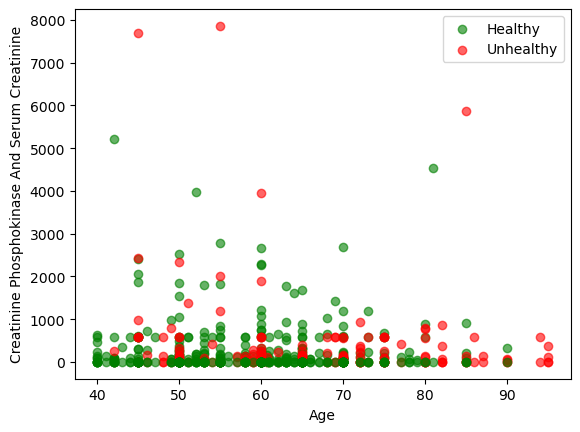

In [3]:
import matplotlib.pyplot as plt

healthy_patients = data[data.DEATH_EVENT == 0]
unhealthy_patients = data[data.DEATH_EVENT == 1]

plt.scatter(healthy_patients.age, healthy_patients.creatinine_phosphokinase, color="green", label="Healthy", alpha=0.6)
plt.scatter(unhealthy_patients.age, unhealthy_patients.creatinine_phosphokinase, color="red", label="Unhealthy", alpha=0.6)
plt.scatter(unhealthy_patients.age, unhealthy_patients.serum_creatinine, color="red",  alpha=0.6)
plt.scatter(healthy_patients.age, healthy_patients.serum_creatinine, color="green",  alpha=0.6)

plt.xlabel("Age")
plt.ylabel("Creatinine Phosphokinase And Serum Creatinine")
plt.legend()
plt.show()


In [4]:
y = data.DEATH_EVENT.values
x_raw_data = data.drop(["DEATH_EVENT"] , axis = 1)
x = (x_raw_data - np.min(x_raw_data))/(np.max(x_raw_data)-np.min(x_raw_data))


print("Raw data before normalization:\n")
print(x_raw_data.head())

print("\n\n\nData we will provide for artificial intelligence training after normalization:\n")
print(x.head())


Raw data before normalization:

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  
0        0     4  
1        0     6  
2        1     

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1 ,random_state=1)

knn = KNeighborsClassifier(n_neighbors = 12) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("The validation test result for K=12 on our test data ", knn.score(x_test, y_test)*100)






The validation test result for K=12 on our test data  73.33333333333333


In [6]:
counter  = 1
for k in range(1,50):
    knn_new = KNeighborsClassifier(n_neighbors = k )
    knn_new.fit(x_train,y_train)
    print(counter, " ", "Accuracy rate: %" , knn_new.score(x_test,y_test)*100)
    counter += 1
    

1   Accuracy rate: % 36.666666666666664
2   Accuracy rate: % 66.66666666666666
3   Accuracy rate: % 56.666666666666664
4   Accuracy rate: % 66.66666666666666
5   Accuracy rate: % 63.33333333333333
6   Accuracy rate: % 63.33333333333333
7   Accuracy rate: % 53.333333333333336
8   Accuracy rate: % 60.0
9   Accuracy rate: % 60.0
10   Accuracy rate: % 70.0
11   Accuracy rate: % 66.66666666666666
12   Accuracy rate: % 73.33333333333333
13   Accuracy rate: % 66.66666666666666
14   Accuracy rate: % 70.0
15   Accuracy rate: % 70.0
16   Accuracy rate: % 70.0
17   Accuracy rate: % 70.0
18   Accuracy rate: % 70.0
19   Accuracy rate: % 63.33333333333333
20   Accuracy rate: % 73.33333333333333
21   Accuracy rate: % 70.0
22   Accuracy rate: % 70.0
23   Accuracy rate: % 70.0
24   Accuracy rate: % 73.33333333333333
25   Accuracy rate: % 70.0
26   Accuracy rate: % 73.33333333333333
27   Accuracy rate: % 73.33333333333333
28   Accuracy rate: % 73.33333333333333
29   Accuracy rate: % 73.33333333333333
30